In [69]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(ggpmisc)
#Load libraries
library(vegan)
library(dplyr)
library(magrittr)
library(scales)
library(grid)
library(reshape2)
library("randomForestSRC")
library(knitr)


In [95]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list

tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data


taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [96]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA"))

In [97]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [98]:
ps_razor =subset_samples(ps, Type=="Razor")
ps_razor

ps_razor_nr =subset_taxa(ps_razor, Genus!="g__MD3-55" )
ps_razor_nr

ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_clip_nr =subset_taxa(ps_Clipped, Genus!="g__MD3-55" )
ps_clip_nr

ps_neg =subset_samples(ps, Type=="Neg")
ps_neg

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_Am_Pl_c =subset_samples(ps_paired, Combo=="Ambient_Placebo")
ps_Am_Pl_c

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [99]:
ps_Am_Pl_c_fill = filter_taxa(ps_Am_Pl_c, function(x) sum(x > 10) > (0.015*length(x)), TRUE)
ps_Am_Pl_c_fill 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1704 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 1704 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1704 tips and 1632 internal nodes ]

In [100]:
# Make a dataframe of training data with OTUs as column and samples as rows
predictors <- t(otu_table(ps_Am_Pl_c_fill))
dim(predictors)

[1]   36 1704

In [101]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_Am_Pl_c_fill)$Surv_nutrients)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)


In [102]:
head(rf.data)

,response,c7e61c6ee34c2f562deb3c6bc59b0eae,c93a0d44c91ddf57f16e348b33b0c6f7,X6edbb8ed23033c3853e1d92df3257020,X6df9d5e09f584d25174dcb711b717415,f0d8a00669a61d0835fe5f3299bb9f19,X8f6bb3cb2c3392009194f1f0ad2046b5,bbb9293c1a19382c3373b6a9b8e716b8,c4b6963c7537d6f1363c09ac3899871d,X6b448c7f0d6dac22d45ddd82a91c0a10,⋯,c8540fe105713727449a0ce0f84b7e83,X2a5872d460e085e60a26fdefce2e980e,X92267a893d644223a12accd84247874f,X37866c7757df5597358d28fd9105336c,X34a565dea2de8c85f91262ced259e35f,X8933a1f18b8c53181cff395fdda73fba,e59233a22d25de8bfc22bf92b61a5236,a081483087574c831e0c3beafc136b4f,X71ba86ce6e8d23e69fd4ad69782e8b04,X7d47ce78ba433517f57f57cecb5079b2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N211-A191,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,13,0,0,0,0,0,0
N102-A012,0.166666667,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
N103-A028,0.2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
N104-276,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
N121-A160,0.8,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
N123-268,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [103]:
set.seed(2)
nut.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
print(nut.classify)

                         Sample size: 36
           Frequency of class labels: 11, 4, 4, 17
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 13.2225
No. of variables tried at each split: 42
              Total no. of variables: 1704
       Resampling used to grow trees: swor
    Resample size used to grow trees: 23
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini
                   (OOB) Brier score: 0.17528436
        (OOB) Normalized Brier score: 0.9348499
                           (OOB) AUC: 0.6161709
   (OOB) Requested performance error: 0.55555556, 0.63636364, 1, 1, 0.29411765

Confusion matrix:

             predicted
  observed    0.166666667 0.2 0.8  1 class.error
  0.166666667           4   1   0  6      0.6364
  0.2                   3   0   0  1      1.0000
  0.8                   1   0   0  3      1.0000
  1                


                                       all   0.166666667       0.2     0.8
X380e94062cd8f44ea50814193ad56225   0.0084        0.0124    0.1019   0.000
ff3e7637bd5aac86cff3b72f9ee78f47    0.0083        0.0124    0.0510   0.017
af9929b8c403fc72989769d9876fc007    0.0063        0.0494    0.0170   0.000
X06376a7ce11874410b0955b4674ff52a   0.0063       -0.0124    0.0849   0.000
X68dd9c00e0187d0e3541a2535f1290d9   0.0049        0.0247    0.0000   0.000
caa981194050ca47e53f144a79dd1bc6    0.0043        0.0124    0.0510   0.000
X51fb5f662d6e879751291f1080a03a1e   0.0043        0.0000    0.0170   0.000
X27dbb0e4b4920b6681df8a9e99c241b5   0.0042        0.0124    0.0000   0.000
X97f533eaf87b00b280b0d77c39bb42c8   0.0042        0.0062   -0.0170   0.017
X7b93a18f6d259a40bc1913d192c5ea71   0.0029        0.0556    0.0170   0.000
ad61137752f6248fea8780525cdca3fa    0.0028        0.0000    0.0000   0.051
X9c37ff0de653f2dba99bce320e9ffe32   0.0022        0.0371    0.0340   0.000
X3b5f722aaf7a00e37027d01

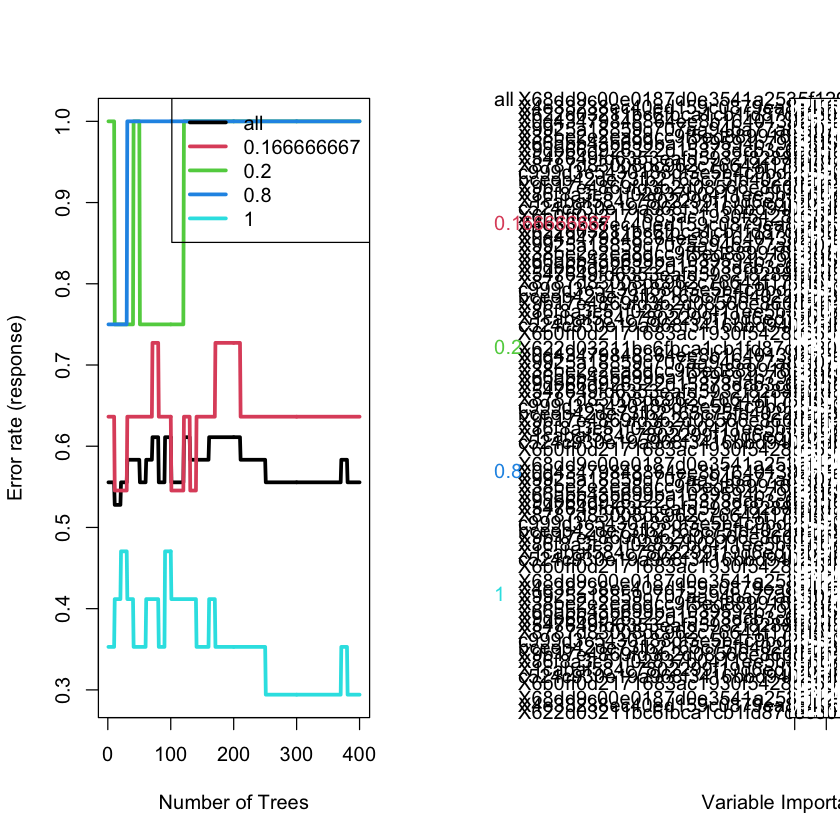

In [104]:
plot(nut.classify)

In [105]:
# What variables are stored in the output?
names(nut.classify)


[1] "call"           "family"         "n"              "ntree"         
 [5] "nimpute"        "mtry"           "nodesize"       "nodedepth"     
 [9] "nsplit"         "yvar"           "yvar.names"     "xvar"          
[13] "xvar.names"     "event.info"     "subj"           "subj.names"    
[17] "xvar.wt"        "split.wt"       "cause.wt"       "leaf.count"    
[21] "proximity"      "forest"         "forest.wt"      "distance"      
[25] "membership"     "tdc.membership" "splitrule"      "inbag"         
[29] "var.used"       "imputed.indv"   "imputed.data"   "split.depth"   
[33] "node.stats"     "ensemble"       "holdout.array"  "block.size"    
[37] "holdout.blk"    "empr.risk"      "oob.empr.risk"  "ctime.internal"
[41] "ctime.external" "predicted"      "class"          "predicted.oob" 
[45] "class.oob"      "cse.num"        "cse.den"        "err.rate"      
[49] "err.block.rate" "csv.num"        "csv.den"        "importance"

In [144]:
nut.classify$importance %>%
as.data.frame() %>%
rownames_to_column("Feature.ID") %>%
inner_join(taxa_16S_df) %>%
arrange(-all) %>%
head(n=20)

Joining, by = "Feature.ID"


,Feature.ID,all,0.166666667,0.2,0.8,1,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ff3e7637bd5aac86cff3b72f9ee78f47,8.330999e-03,1.235583e-02,0.05096778,0.01698926,2.398484e-02,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105
2,af9929b8c403fc72989769d9876fc007,6.290850e-03,4.942331e-02,0.01698926,0.00000000,2.263424e-17,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_6931
3,caa981194050ca47e53f144a79dd1bc6,4.307890e-03,1.235583e-02,0.05096778,0.00000000,3.997473e-03,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Spirochaeta_2,NA,ASV_8044
4,ad61137752f6248fea8780525cdca3fa,2.837302e-03,0.000000e+00,0.00000000,0.05096778,3.997473e-03,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,NA,NA,ASV_6855
5,faf380a66c28b1c96fb49a96c1a9469f,2.124183e-03,0.000000e+00,0.00000000,0.01698926,7.994947e-03,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Francisellales,f__Francisellaceae,g__[Caedibacter]_taeniospiralis_group,s__Cysteiniphilum_litorale,ASV_9930
6,fa366be7606b9579ca1726d958c74e04,2.123016e-03,6.177913e-03,0.00000000,0.00000000,7.994947e-03,d__Bacteria,p__Verrucomicrobiota,c__Verrucomicrobiae,o__Verrucomicrobiales,f__Rubritaleaceae,g__Haloferula,s__uncultured_Haloferula,ASV_9907
7,e002512f5f00a0541aec918b18cf04c5,2.103175e-03,6.177913e-03,0.00000000,0.01698926,3.997473e-03,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Phormidesmiales,f__Nodosilineaceae,g__MBIC10086,s__Pseudanabaena_cf.,ASV_8886
8,b5a357aca74c0d00b3adcc24fa98c9dd,2.083333e-03,6.177913e-03,0.00000000,0.00000000,7.994947e-03,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Spirochaeta_2,NA,ASV_7184
9,c82ca3e77526f2854e4e1cdf726e40c9,2.063492e-03,-6.177913e-03,0.00000000,0.00000000,1.598989e-02,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,f__Endozoicomonadaceae,g__Endozoicomonas,s__Acropora_cervicornis,ASV_7953


Joining, by = "Feature.ID"


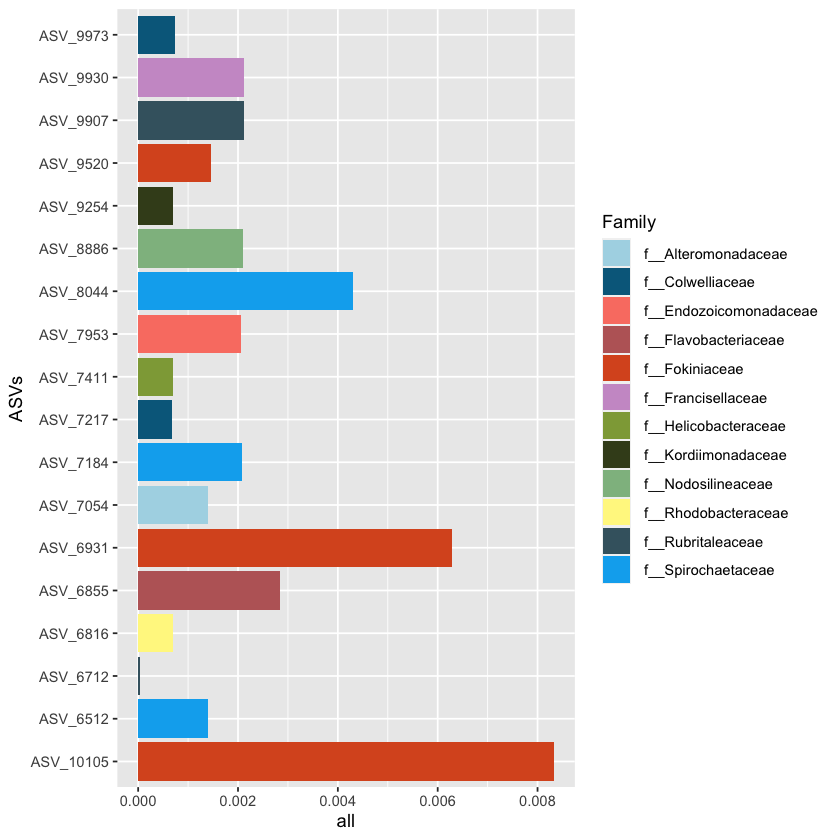

In [190]:
taxa_16S_df = as.data.frame(taxa_16S)

nut.classify$importance %>%
as.data.frame() %>%
filter(all>0.000001) %>%
rownames_to_column("Feature.ID") %>%
inner_join(taxa_16S_df) %>%
ggplot(aes(x = ASVs, y = all, fill=Family)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values=c( 
                         
                        
                          "lightblue", "#00688B", "salmon", "#bc6767",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1")) 


In [191]:
nut.classify$importance %>%
as.data.frame() %>%
rownames_to_column("Feature.ID") %>%
inner_join(taxa_16S_df) %>%
arrange(-all) %>%
filter(all>0.000001) %>%
select(Feature.ID)  %>%
column_to_rownames("Feature.ID") %>%
as.matrix()



Joining, by = "Feature.ID"


ff3e7637bd5aac86cff3b72f9ee78f47
af9929b8c403fc72989769d9876fc007
caa981194050ca47e53f144a79dd1bc6
ad61137752f6248fea8780525cdca3fa
faf380a66c28b1c96fb49a96c1a9469f
fa366be7606b9579ca1726d958c74e04
e002512f5f00a0541aec918b18cf04c5
b5a357aca74c0d00b3adcc24fa98c9dd
c82ca3e77526f2854e4e1cdf726e40c9
efd45dbce0ff782596ca0cde99a572a8
b263bdbc83e8a198096791aba4f5813f


In [192]:
GoodTaxa = c("ff3e7637bd5aac86cff3b72f9ee78f47",
"af9929b8c403fc72989769d9876fc007",
"caa981194050ca47e53f144a79dd1bc6",
"ad61137752f6248fea8780525cdca3fa",
"faf380a66c28b1c96fb49a96c1a9469f",
"fa366be7606b9579ca1726d958c74e04",
"e002512f5f00a0541aec918b18cf04c5",
"b5a357aca74c0d00b3adcc24fa98c9dd",
"c82ca3e77526f2854e4e1cdf726e40c9",
"efd45dbce0ff782596ca0cde99a572a8",
"b263bdbc83e8a198096791aba4f5813f",
"a3c29bcb6997cfe572a474e58291af1d",
"fbf8d59390f97ae9fdb51009306b8c61",
"ac6820155a85d9cc15f8f62406e10e42",
"e88e0115813c4f8cf97025a3d9a05733",
"bb4d4573ec2f385c378b7334112b45de",
"b67ad635977da62608ed6a6ab8f24e12",
"a9753fb873feede8ae92d70ae31a7d8f")

In [193]:
allTaxa = taxa_names(ps_Am_Pl_c)
allTaxa <- allTaxa[(allTaxa %in% GoodTaxa)]
sig_psr = prune_taxa(allTaxa, ps_Am_Pl_c)

sig_psr

melt_ps_treat <- sig_psr %>%
psmelt() #%>% 


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 18 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 18 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 18 tips and 17 internal nodes ]

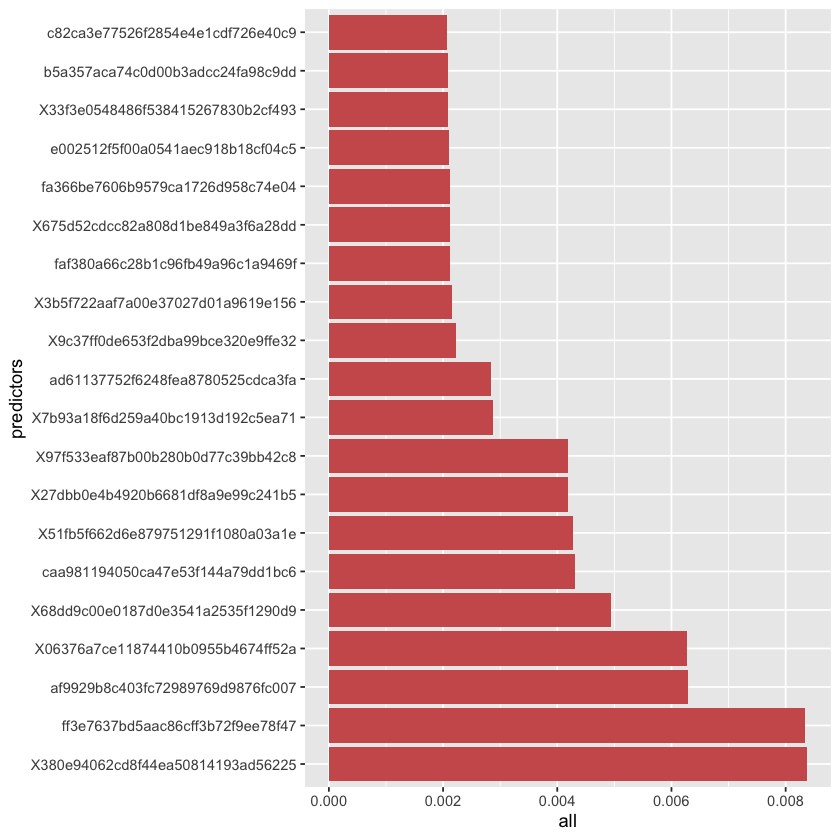

In [194]:
# Make a data frame with predictor names and their importance
imp <- nut.classify$importance
imp <- data.frame(predictors = rownames(imp), imp)

# Order the predictor levels by importance
imp.sort <- arrange(imp, desc(all))
imp.sort$predictors <- factor(imp.sort$predictors, levels = imp.sort$predictors)

# Select the top 10 predictors
imp.20 <- imp.sort[1:20, ]


# ggplot
ggplot(imp.20, aes(x = predictors, y = all)) +
  geom_bar(stat = "identity", fill = "indianred") +
  coord_flip()

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warn

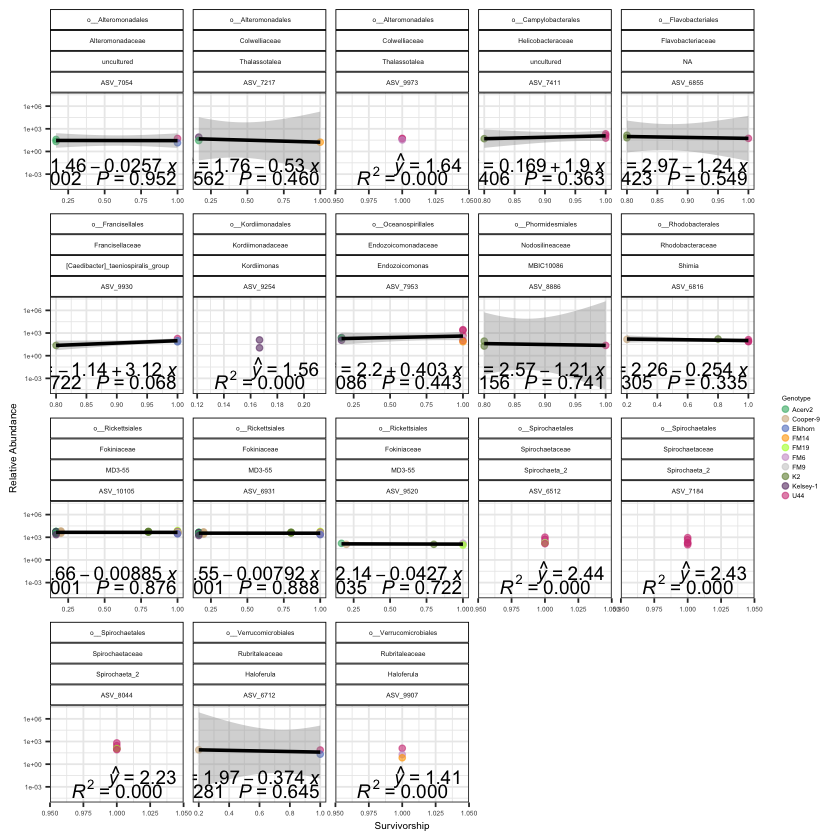

In [197]:
melt_ps_treat  %>%
filter(Abundance >0) %>%
#filter(Genus==c(" g__Spirochaeta_2")) %>%
#filter(Genotype!="U44") %>%
filter(Diseased=="Placebo") %>%
filter(Nutrients=="Ambient") %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "g__",
                replacement = "")  %>%

mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "f__",
                replacement = "")  %>%
ggplot(
       aes(x=Surv_nutrients, y= Abundance, color=Genotype)) + 
geom_point(aes(color=Genotype) , alpha=.6) + 
theme_bw() +
ylab("Relative Abundance") +
xlab("Survivorship") +

facet_wrap(.~Order*Family*Genus*ASVs, scales="free_x") +

geom_smooth(method='lm', color="black") +
 

 stat_poly_eq(formula = y ~ x,
                eq.with.lhs = "italic(hat(y))~`=`~",
                aes(label = paste( ..rr.label.., ..p.value.label.., sep = "~~~")), 
                parse = TRUE, label.y = "bottom", label.x = "right", color="black",
             rr.digits = 3, , size = 4) +

 stat_poly_eq(aes(label = paste(..eq.label.., sep = "~~~")), 
               label.y = 0.15,
               eq.with.lhs = "italic(hat(y))~`=`~",
               eq.x.rhs = "~italic(x)",
               formula = y ~ x, parse = TRUE, size = 4,
               label.x = "right", color="black") +

scale_color_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588"
                          )) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
scale_y_continuous(trans = "log10") +
labs(fill='Taxon')  +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, ncol=1)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
theme(strip.text.x = element_text(size = 4)) 
